## EDA: Exploratory Data Analysis

This notebook will be used to document the analises made in order to understand the complexity of our dataset, and understand some key points for our development, like: 
- Understand data behaviour;
- Data Cleaning;
- Feature Importance;

Information about the dataset, directly from kaggle:

### Telcom Customer Churn
Detail:

Each row represents a customer, each column contains customer‚Äôs attributes described on the column Metadata.
The raw data contains 7043 rows (customers) and 21 columns (features).
The ‚ÄúChurn‚Äù column is our target. 

Fields:
- **customerID**: Customer ID
- **gender**: Whether the customer is a male or a female
- **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
- **Partner**: Whether the customer has a partner or not (Yes, No)
- **Dependents**: Whether the customer has dependents or not (Yes, No)
- **tenure**: Number of months the customer has stayed with the company
- **PhoneService**: Whether the customer has a phone service or not (Yes, No)
- **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService**: Customer‚Äôs internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod**: The customer‚Äôs payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges**: The amount charged to the customer monthly
- **TotalCharges**: The total amount charged to the customer
- **Churn**: Whether the customer churned or not (Yes or No)

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import kagglehub
import glob

In [76]:
class KaggleDatasetTraining():
    def __init__(self):
        """Initialize the KaggleDatasetTraining class."""
        kaggle_username = os.getenv("KAGGLE_USERNAME")
        kaggle_key = os.getenv("KAGGLE_KEY")
        
        if not kaggle_username or not kaggle_key:
            raise ValueError("KAGGLE_USERNAME and KAGGLE_KEY must be set in the environment variables.")
        
    def fetch_kaggle_dataset(self, dataset_name: str) -> pd.DataFrame:
        """Function to fetch a Kaggle dataset and transform it into a pandas DataFrame.

        Args:
            dataset_name (str): Name of the Kaggle dataset to be fetched

        Returns:
            pd.DataFrame: pandas DataFrame containing the data from the dataset
        """
        
        try:
            path = kagglehub.dataset_download(dataset_name)
            
            csv_files = glob.glob(f"{path}/*.csv")
            
            return pd.read_csv(csv_files[0])
        
        except ValueError as e:
            raise ValueError(f"Error fetching the dataset: {dataset_name}. Error: {str(e)}")
        
        except Exception as e:
            raise Exception(f"An unexpected error occurred: {dataset_name}. Error: {str(e)}")
        
train = KaggleDatasetTraining()

df = train.fetch_kaggle_dataset("blastchar/telco-customer-churn")

## Presenting few rows from the dataset, so we can start the analysis

In [77]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [78]:
# As we see, costumerID is not a feature that will help us in the analysis, so we can drop it
df.drop(columns=["customerID"], inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


As we see, we have TotalCharges that for some reason is considered an object, not a float. So, let's understand why:

In [80]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [81]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [82]:
total_charges_analysis = df['TotalCharges'].to_frame().copy()
total_charges_analysis['TotalCharges_converted'] = pd.to_numeric(total_charges_analysis['TotalCharges'], errors='coerce')
print(f"Contagem de dados n√£o num√©ricos em TotalCharges: {total_charges_analysis['TotalCharges_converted'].isnull().sum()}")
print("Lista dos valores n√£o num√©ricos em TotalCharges:")
print(total_charges_analysis[total_charges_analysis['TotalCharges_converted'].isnull()]['TotalCharges'].unique())

Contagem de dados n√£o num√©ricos em TotalCharges: 11
Lista dos valores n√£o num√©ricos em TotalCharges:
[' ']


As we see, TotalCharges, has 11 registries as empty string. So, we need to clean this up and then we can convert the field from object to float.

In [83]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float).round(2)
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

As we have only 11 entries as Total Charges as Null, we will simple remove this rows. But in a real world cen√°rio, it would be best if we understand why this data is null, and if it is some system error, how we could inference the value. Maybe substituting TotalCharges for the values in MontlyCharges, or clustering the clients and substituting for the mean value of the cluster. 

In [84]:
df[df['TotalCharges'].isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

In [85]:
df = df[df['TotalCharges'].notnull()]

df['TotalCharges'].isnull().sum()  # Should be 0 now

np.int64(0)

## Statistics from all fields

In [86]:
df.describe(include='all').T

count unique               top  freq         mean  \
gender              7032      2              Male  3549          NaN   
SeniorCitizen     7032.0    NaN               NaN   NaN       0.1624   
Partner             7032      2                No  3639          NaN   
Dependents          7032      2                No  4933          NaN   
tenure            7032.0    NaN               NaN   NaN    32.421786   
PhoneService        7032      2               Yes  6352          NaN   
MultipleLines       7032      3                No  3385          NaN   
InternetService     7032      3       Fiber optic  3096          NaN   
OnlineSecurity      7032      3                No  3497          NaN   
OnlineBackup        7032      3                No  3087          NaN   
DeviceProtection    7032      3                No  3094          NaN   
TechSupport         7032      3                No  3472          NaN   
StreamingTV         7032      3                No  2809          NaN   
StreamingMovies     7032      3                No  2781          NaN   
Contract            7032      3    Month-to-month  3875          NaN   
PaperlessBilling    7032      2               Yes  4168          NaN   
PaymentMethod       7032      4  Electronic check  2365          NaN   
MonthlyCharges    7032.0    NaN               NaN   NaN    64.798208   
TotalCharges      7032.0    NaN               NaN   NaN  2283.300441   
Churn               7032      2                No  5163          NaN   

                          std    min      25%       50%        75%     max  
gender                    NaN    NaN      NaN       NaN        NaN     NaN  
SeniorCitizen        0.368844    0.0      0.0       0.0        0.0     1.0  
Partner                   NaN    NaN      NaN       NaN        NaN     NaN  
Dependents                NaN    NaN      NaN       NaN        NaN     NaN  
tenure               24.54526    1.0      9.0      29.0       55.0    72.0  
PhoneService              NaN    NaN      NaN       NaN        NaN     NaN  
MultipleLines             NaN    NaN      NaN       NaN        NaN     NaN  
InternetService           NaN    NaN      NaN       NaN        NaN     NaN  
OnlineSecurity            NaN    NaN      NaN       NaN        NaN     NaN  
OnlineBackup              NaN    NaN      NaN       NaN        NaN     NaN  
DeviceProtection          NaN    NaN      NaN       NaN        NaN     NaN  
TechSupport               NaN    NaN      NaN       NaN        NaN     NaN  
StreamingTV               NaN    NaN      NaN       NaN        NaN     NaN  
StreamingMovies           NaN    NaN      NaN       NaN        NaN     NaN  
Contract                  NaN    NaN      NaN       NaN        NaN     NaN  
PaperlessBilling          NaN    NaN      NaN       NaN        NaN     NaN  
PaymentMethod             NaN    NaN      NaN       NaN        NaN     NaN  
MonthlyCharges      30.085974  18.25  35.5875     70.35    89.8625  118.75  
TotalCharges      2266.771362   18.8   401.45  1397.475  3794.7375  8684.8  
Churn                     NaN    NaN      NaN       NaN        NaN     NaN

In [87]:
print(f"contagem de strings vazias em todo o dataframe: {(df == '').sum().sum()}")
print(f"contagem de strings com espa√ßo em todo o dataframe: {(df == ' ').sum().sum()}")


contagem de strings vazias em todo o dataframe: 0
contagem de strings com espa√ßo em todo o dataframe: 0


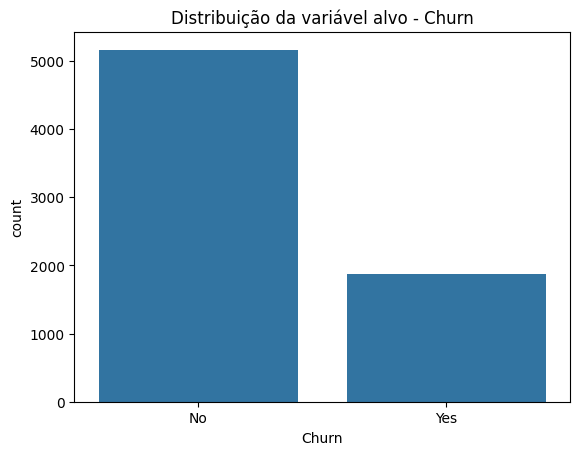

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

In [88]:
sns.countplot(data=df, x='Churn')
plt.title("Distribui√ß√£o da vari√°vel alvo - Churn")
plt.show()

df['Churn'].value_counts(normalize=True)

As we see, the values of churn are not ballanced. So we will have to be carefull when we split the dataset for training and testing!!

### Transforming binary columns into num√©ric

Here, the ideia is to get all binary columns, that have values like "No or Yes" and "Male and Female" and transform this categories as 1 or 0.

In [89]:
bin_cols = ["gender","Partner","Dependents","PhoneService","PaperlessBilling","Churn"]
for col in bin_cols:
    df[col]=df[col].map({"Yes":1, "No":0, "Male":1, "Female":0})

## Graphical Analysis

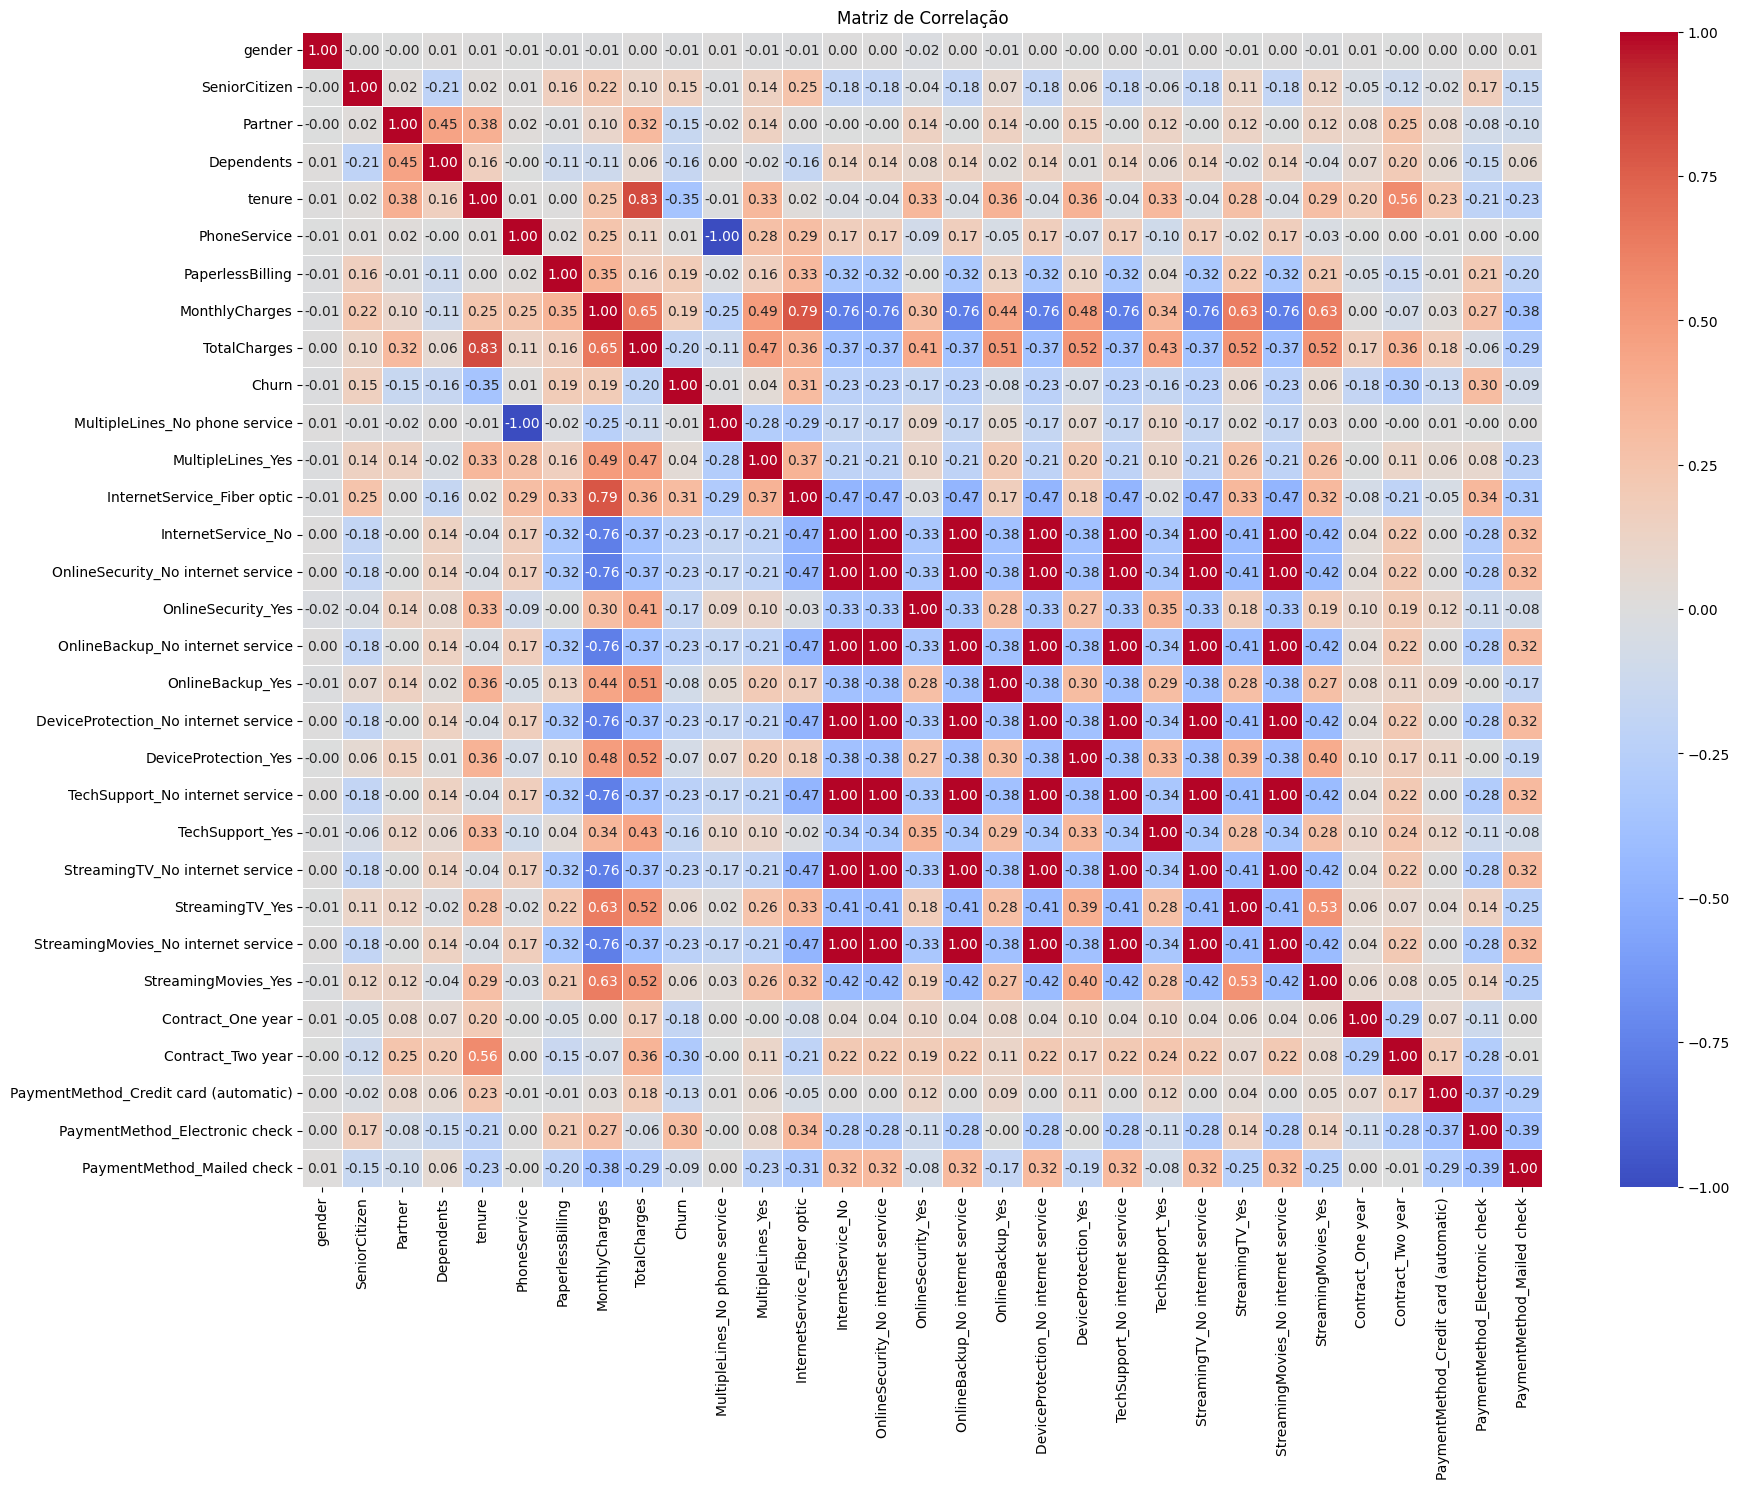

In [90]:
multi_cols= ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]

df_encoded = pd.get_dummies(df, columns=multi_cols, drop_first=True)

correlation_matrix = df_encoded.corr(method='pearson')

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correla√ß√£o")
plt.show()

## Analyzing the pairplot for each numerical variable:

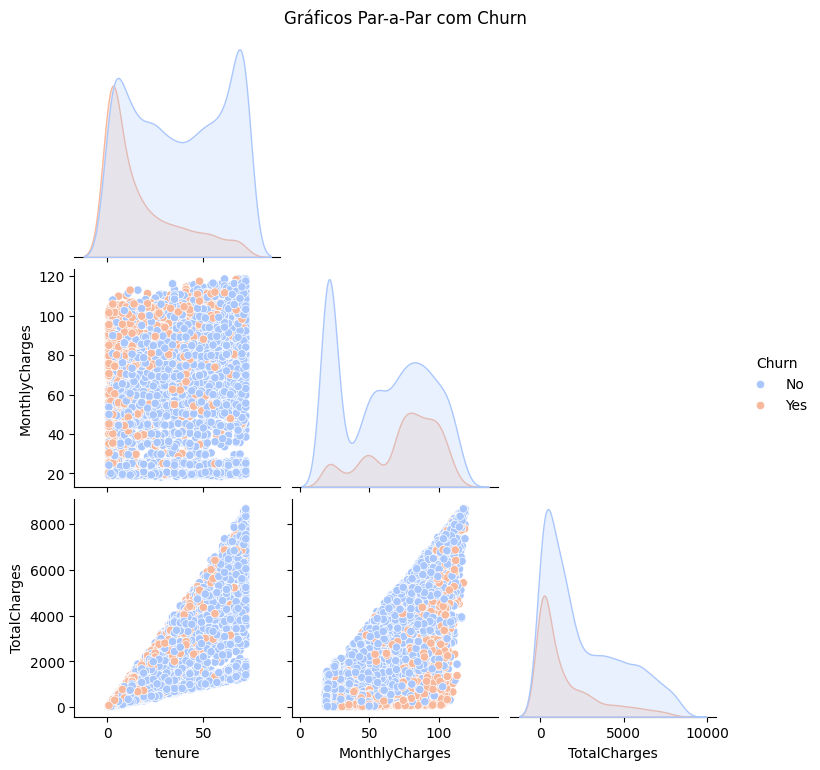

In [91]:
pairplot_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
df_plot = df[pairplot_cols].copy()
df_plot['Churn'] = df_plot['Churn'].map({0: 'No', 1: 'Yes'})  # Para plotagem colorida

sns.pairplot(df_plot, hue='Churn', corner=True, diag_kind='kde', palette='coolwarm')
plt.suptitle("Gr√°ficos Par-a-Par com Churn", y=1.02)
plt.show()

One interesting insight derived from the pairplot analysis is the clear relationship between customer tenure and churn behavior. The plots reveal that the longer a customer stays with the service, the lower the likelihood of churn.

More specifically, customers with shorter tenure periods (typically under 10 months) show a higher concentration of churn cases, while those who have been with the service longer are much more likely to remain. This suggests that early-stage customer retention strategies could have a significant impact on reducing overall churn rates.

This insight not only reinforces the value of long-term engagement but also highlights the importance of targeting new customers with onboarding and loyalty initiatives to improve long-term retention.

## Model Training

In [100]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
print(f"Distribui√ß√£o de valores churn para treinamento: {y_train.to_frame().value_counts()}")

print(f"Distribui√ß√£o de valores churn para teste: {y_test.to_frame().value_counts()}")

Distribui√ß√£o de valores churn para treinamento: Churn
0        4130
1        1495
Name: count, dtype: int64
Distribui√ß√£o de valores churn para teste: Churn
0        1033
1         374
Name: count, dtype: int64


In [97]:
from sklearn.metrics import classification_report, confusion_matrix

def model_analysis(model, X_test, y_test):
    """Function analyze a models performance with classification report metrics and confusion matrix."""
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("score: ", model.score(X_test, y_test))

    print("Confusion Matrix:")

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('üîç Confusion Matrix')
    plt.tight_layout()
    plt.show()

In [104]:
from sklearn.metrics import precision_recall_curve
import numpy as np

def plot_precision_recall_vs_threshold(model, X_test, y_test):
    """Plot precision and recall against different thresholds for a given model.

    Args:
        model: trained model to evaluate
        X_test: features for testing the model
        y_test: true labels for testing the model
    """
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precision[:-1], label="Precision", color="blue")
    plt.plot(thresholds, recall[:-1], label="Recall", color="red")
    plt.xlabel('threshold')
    plt.ylabel('Score')
    plt.title('Precision-Recall vs Threshold')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

### Random Forest:

Model training and evaluation completed successfully.
Start Model Analysis
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407

score:  0.7882018479033405
Confusion Matrix:


/tmp/ipykernel_648834/567322945.py:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sylvio_neto/churn_model_fastapi/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


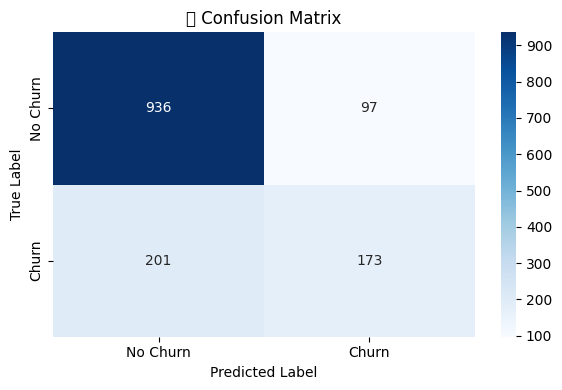

Precision and Recall vs Threshold


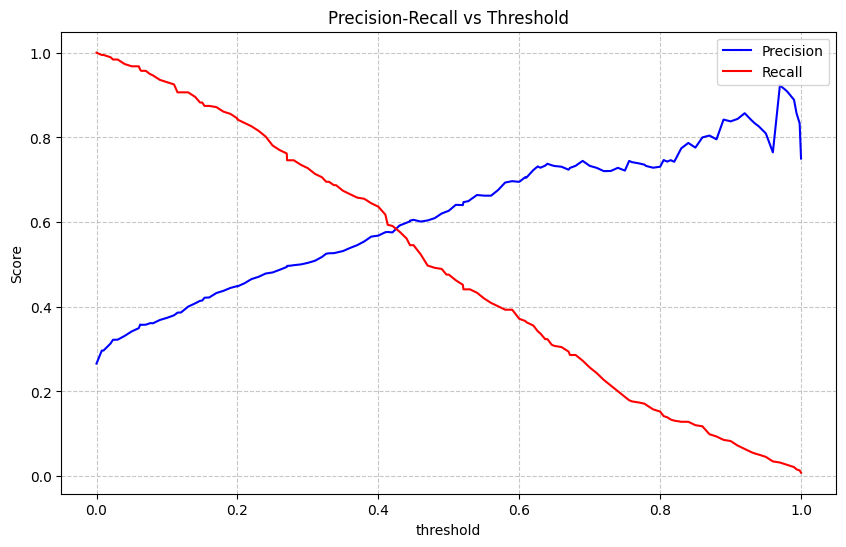

In [105]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into features and target variable
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("Model training and evaluation completed successfully.")

print("Start Model Analysis")
model_analysis(rf_model, X_test, y_test)

print("Precision and Recall vs Threshold")
plot_precision_recall_vs_threshold(rf_model, X_test, y_test)

### XGBoost Training:

/home/sylvio_neto/churn_model_fastapi/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training and evaluation completed successfully.
Start Model Analysis
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407

score:  0.7739872068230277
Confusion Matrix:


/tmp/ipykernel_648834/567322945.py:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sylvio_neto/churn_model_fastapi/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


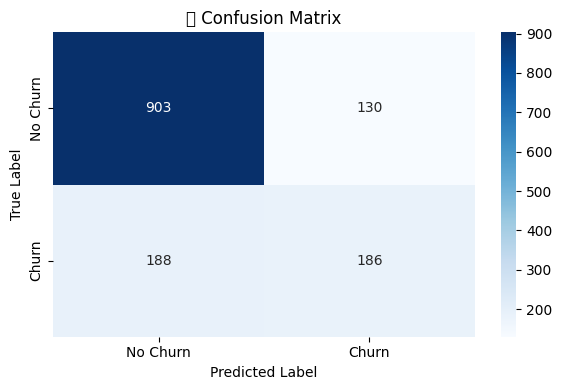

Precision and Recall vs Threshold


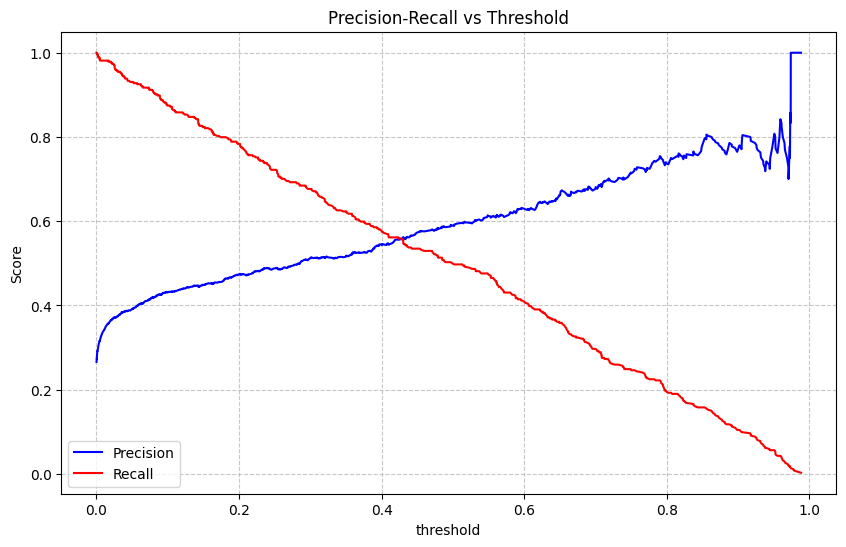

In [108]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

print("Model training and evaluation completed successfully.")

print("Start Model Analysis")
model_analysis(xgb_model, X_test, y_test)

print("Precision and Recall vs Threshold")
plot_precision_recall_vs_threshold(xgb_model, X_test, y_test)

### LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
Model training and evaluation completed successfully.
Start Model Analysis
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1

/tmp/ipykernel_648834/567322945.py:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/sylvio_neto/churn_model_fastapi/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


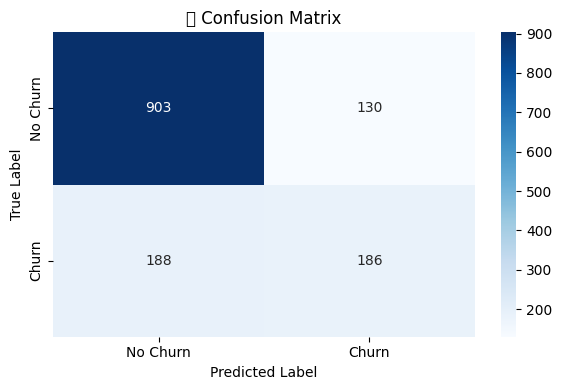

Precision and Recall vs Threshold


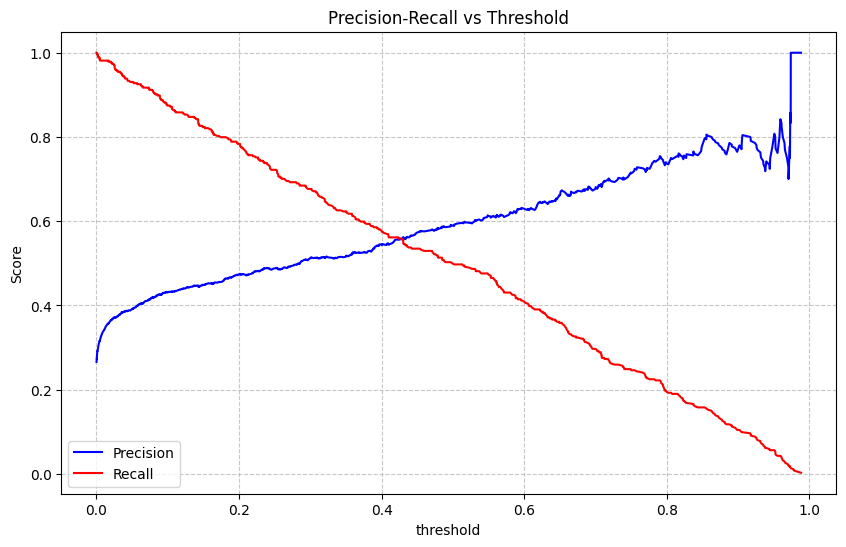

In [109]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

print("Model training and evaluation completed successfully.")

print("Start Model Analysis")
model_analysis(xgb_model, X_test, y_test)

print("Precision and Recall vs Threshold")
plot_precision_recall_vs_threshold(xgb_model, X_test, y_test)